In [13]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter 
from model import model_trainer

In [14]:
print(f'Torch version: {torch.__version__}, Torchvision Version: {torchvision.__version__}')


Torch version: 1.12.1, Torchvision Version: 0.13.1


In [15]:
image_size = 64
batch_size = 128

In [16]:
### Dataset Downloader - CelebA Dataset
img_transform = transforms.Compose(
    [   transforms.Resize(image_size),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [17]:
# CelebA dataset containes more than 2 million images of celebrities
# here I am only selecting 20K images randomly (limited resources due to training on laptop)
dataset = torchvision.datasets .ImageFolder(root='../../_DATA_/CelebA/imgs/',transform=img_transform)
dataset_subset = torch.utils.data.Subset(dataset, np.random.choice(len(dataset), 20000, replace=False))
dataloader = DataLoader(dataset_subset, batch_size=batch_size, shuffle=True)

In [18]:
# this is the length of the dataloader divided by batch size
len(dataloader)

157

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

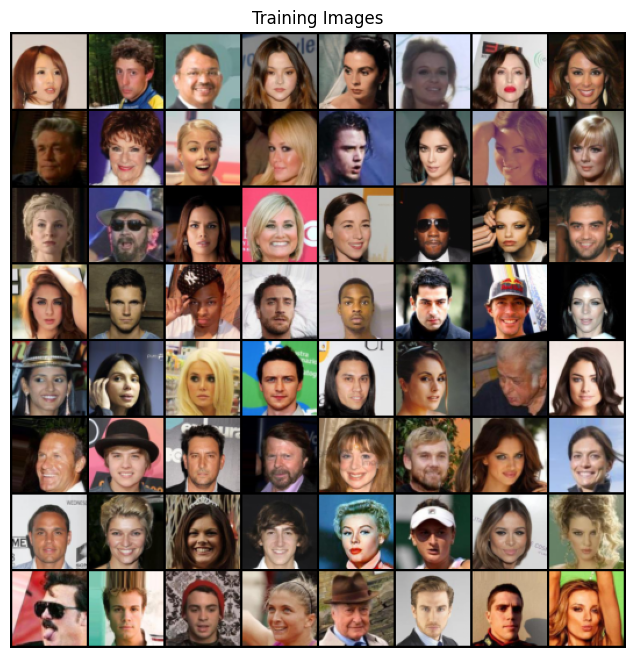

In [20]:
# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [21]:
np.shape(next(iter(dataloader))[0][1]) # first dim is class, second is the number of image in batch_size, the net dims: nc,H,W

torch.Size([3, 64, 64])

In [22]:

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 10

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5


In [23]:
g,d,img_list = model_trainer(dataloader, ndf,ngf, nc,nz,num_epochs, lr,beta1)

Starting Training Loop...
[0/10][0/157]	Loss_D: 1.8163	Loss_G: 3.5183	D(x): 0.4018	D(G(z)): 0.4288 / 0.0444
[0/10][50/157]	Loss_D: 0.1208	Loss_G: 21.5069	D(x): 0.9383	D(G(z)): 0.0000 / 0.0000
[0/10][100/157]	Loss_D: 0.5563	Loss_G: 6.2795	D(x): 0.7524	D(G(z)): 0.0022 / 0.0032
[0/10][150/157]	Loss_D: 0.3087	Loss_G: 5.3382	D(x): 0.8938	D(G(z)): 0.1491 / 0.0094
[1/10][0/157]	Loss_D: 0.4558	Loss_G: 3.2031	D(x): 0.8434	D(G(z)): 0.1687 / 0.0664
[1/10][50/157]	Loss_D: 0.3600	Loss_G: 3.7001	D(x): 0.8923	D(G(z)): 0.1731 / 0.0373
[1/10][100/157]	Loss_D: 1.0720	Loss_G: 5.6150	D(x): 0.5308	D(G(z)): 0.0167 / 0.0122
[1/10][150/157]	Loss_D: 0.4373	Loss_G: 2.9702	D(x): 0.8490	D(G(z)): 0.1817 / 0.0831
[2/10][0/157]	Loss_D: 1.2052	Loss_G: 5.9694	D(x): 0.9639	D(G(z)): 0.5871 / 0.0070
[2/10][50/157]	Loss_D: 0.4972	Loss_G: 3.2428	D(x): 0.7379	D(G(z)): 0.0856 / 0.0715
[2/10][100/157]	Loss_D: 0.6584	Loss_G: 2.7580	D(x): 0.6934	D(G(z)): 0.1682 / 0.0904
[2/10][150/157]	Loss_D: 0.3990	Loss_G: 6.4013	D(x): 0.9473

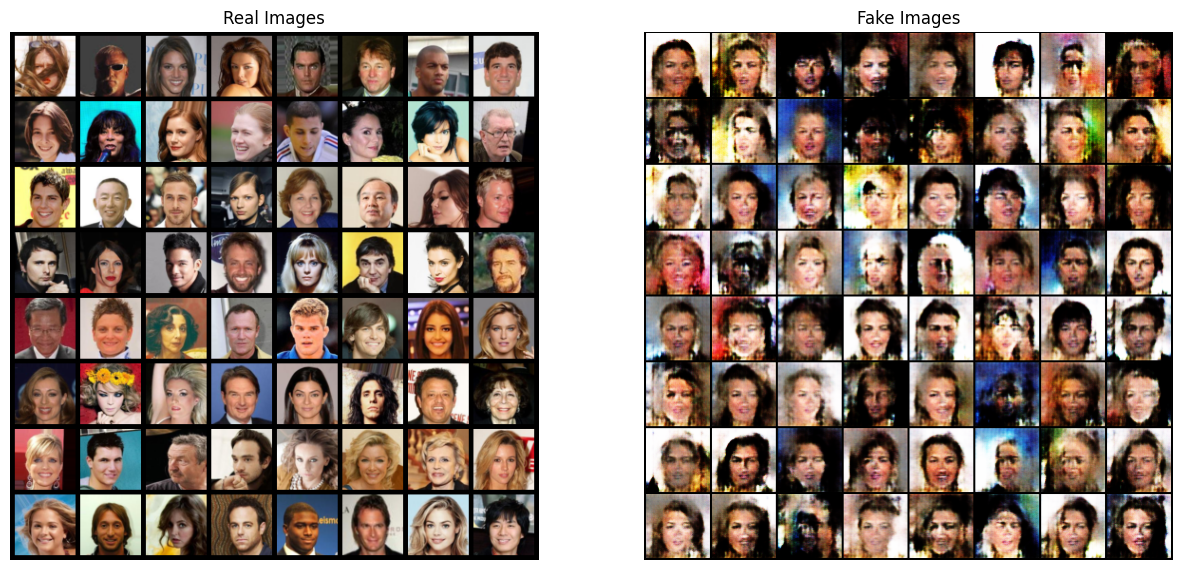

In [24]:
# Grab a batch of real images from the dataloader
real_batch = next(iter(dataloader))

# Plot the real images
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.axis("off")
plt.title("Real Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(real_batch[0].to(device)[:64], padding=5, normalize=True).cpu(),(1,2,0)))

# Plot the fake images from the last epoch
plt.subplot(1,2,2)
plt.axis("off")
plt.title("Fake Images")
plt.imshow(np.transpose(img_list[-1],(1,2,0)))
plt.show()